In [23]:
import plot
import importlib
import numpy as np
import random
import os
import glob
import h5py
import math
import scipy
import random
import classify
import warnings
import preprocess
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from os import path
from scipy import stats
from scipy.io import loadmat
from matplotlib import gridspec
from numpy.linalg import norm
from scipy.spatial import distance
from sklearn import decomposition
from matplotlib.colors import LinearSegmentedColormap
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.random.seed(42)
random.seed(42)


In [47]:
import glob
import json

output_dir = "LR_results/SER2"
pattern = os.path.join(output_dir, "*_all_days_LR_results.json")

all_mice_results = {}
for filepath in glob.glob(pattern):
    fname = os.path.basename(filepath)
    mouse = fname.replace("_all_days_LR_results.json", "")
    df = pd.read_json(filepath, orient='records')
    all_mice_results[mouse] = df

for mouse, df in all_mice_results.items():
    print(f"{mouse}: {df.shape[0]} rows, columns = {df.columns.tolist()}")

output_dir = "LR_results/No_cat2"
pattern = os.path.join(output_dir, "*_all_days_LR_results.json")

all_mice_results_cross = {}
for filepath in glob.glob(pattern):
    fname = os.path.basename(filepath)
    mouse = fname.replace("_all_days_LR_results.json", "")
    df = pd.read_json(filepath, orient='records')
    all_mice_results_cross[mouse] = df

for mouse, df in all_mice_results_cross.items():
    print(f"{mouse}: {df.shape[0]} rows, columns = {df.columns.tolist()}")


NN9: 20 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN8: 25 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN11: 20 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN23: 25 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN28: 25 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN9: 16 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN8: 20 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN11: 16 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true', 'mouse', 'date']
NN23: 20 rows, columns = ['model', 'all_accs', 'mean_accuracy', 'std_accurac

# testing

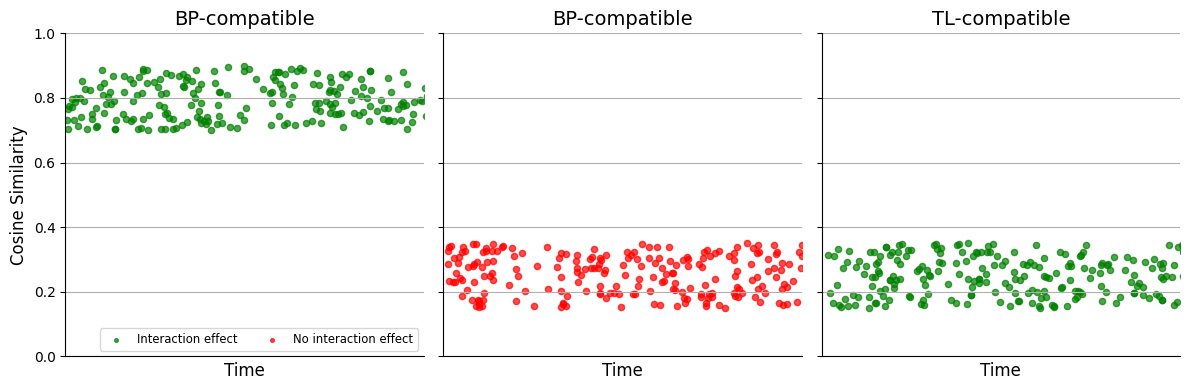

In [22]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n_points = 250

x1 = np.random.uniform(0.5, 4, n_points)
x2 = np.random.uniform(0.5, 4, n_points)
x3 = np.random.uniform(0.5, 4, n_points)

# Y-values for interaction (green) and no interaction (red)
y_interact_bp = np.random.uniform(0.7, 0.9, n_points)
y_nointer_bp  = np.random.uniform(0.15, 0.35, n_points)
y_interact_tl = np.random.uniform(0.15, 0.35, n_points)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Left panel: BP-compatible (interaction)
axes[0].scatter(x1, y_interact_bp,
                s=20,           # smaller size
                alpha=0.7,
                color='green',
                label='Interaction effect')
axes[0].set_title('BP-compatible', fontsize=14)
axes[0].set_xlim(0.5, 3.5)
axes[0].set_ylim(0, 1)
axes[0].set_xticks([])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Middle panel: BP-compatible (no interaction)
axes[1].scatter(x2, y_nointer_bp,
                s=20,
                alpha=0.7,
                color='red',
                label='No interaction effect')
axes[1].set_title('BP-compatible', fontsize=14)
axes[1].set_xlim(0.5, 3.5)
axes[1].set_ylim(0, 1)
axes[1].set_xticks([])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Right panel: TL-compatible (interaction)
axes[2].scatter(x3, y_interact_tl,
                s=20,
                alpha=0.7,
                color='green')
axes[2].set_title('TL-compatible', fontsize=14)
axes[2].set_xlim(0.5, 3.5)
axes[2].set_ylim(0, 1)
axes[2].set_xticks([])
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)


# Labels
axes[0].set_ylabel('Cosine Similarity', fontsize=12)
axes[0].set_xlabel('Time', fontsize=12)
axes[1].set_xlabel('Time', fontsize=12)
axes[2].set_xlabel('Time', fontsize=12)
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)


h0, l0 = axes[0].get_legend_handles_labels()
h1, l1 = axes[1].get_legend_handles_labels()

green_handle = axes[0].collections[0]
red_handle   = axes[1].collections[0]

axes[0].legend([green_handle, red_handle],
               ['Interaction effect', 'No interaction effect'],
               loc='lower right',
               ncol=2,
               frameon=True,
               fontsize='small',    # smaller text
    markerscale=0.6 )


plt.tight_layout()
plt.show()


No data for model SER_min_r_SER, skipping.


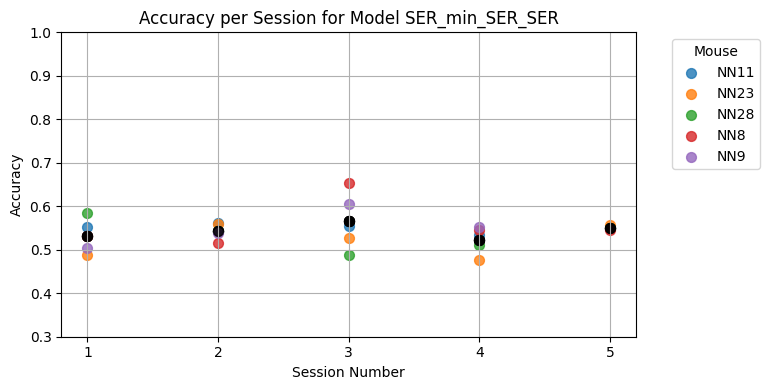

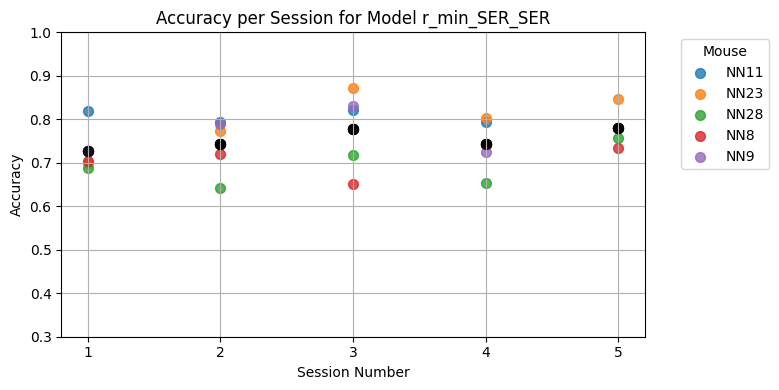

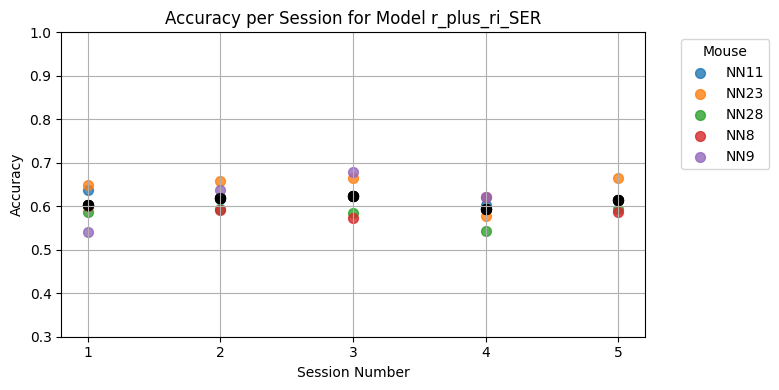

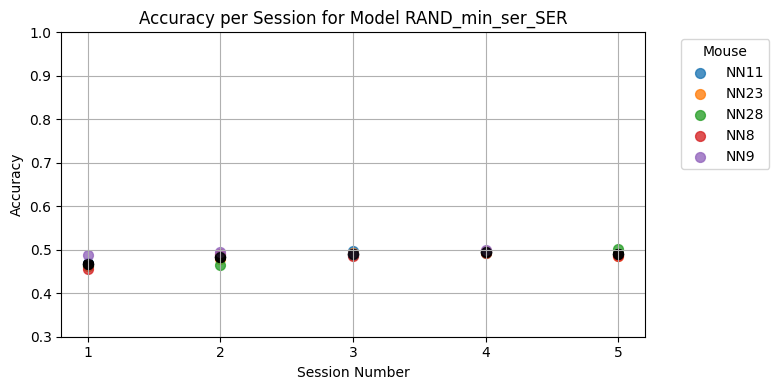

No data for model SER_min_r_SER, skipping.


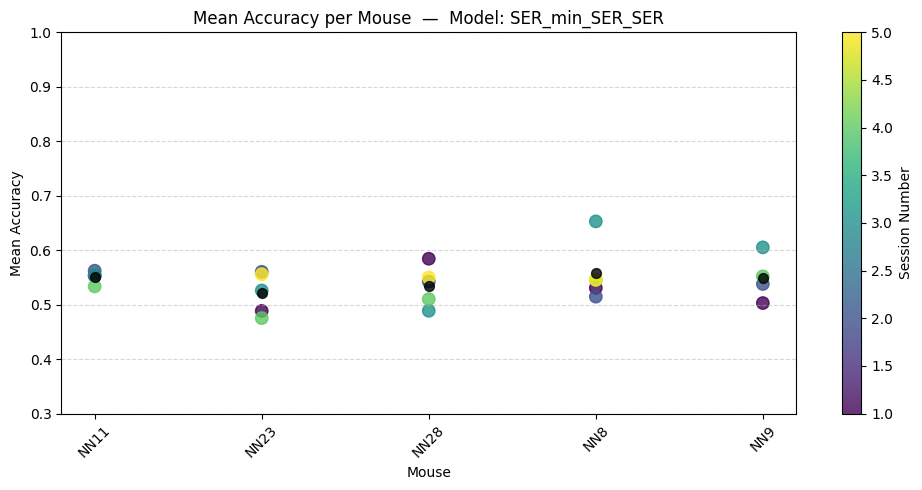

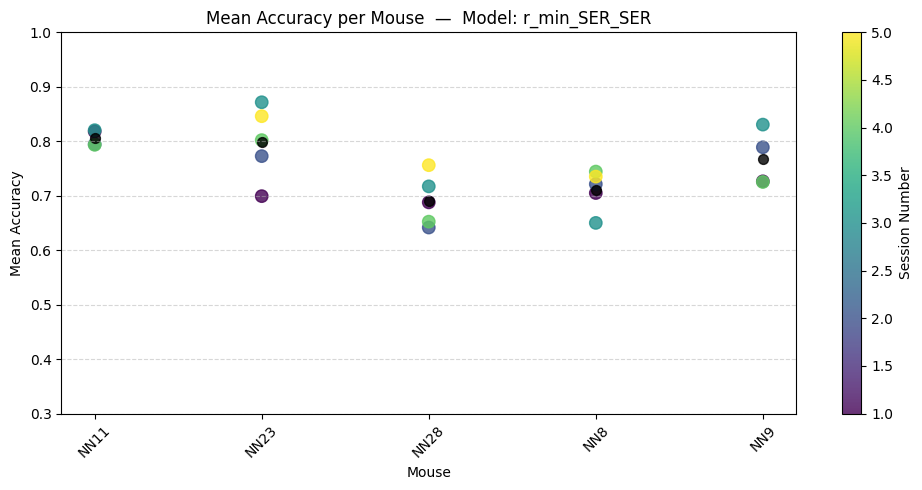

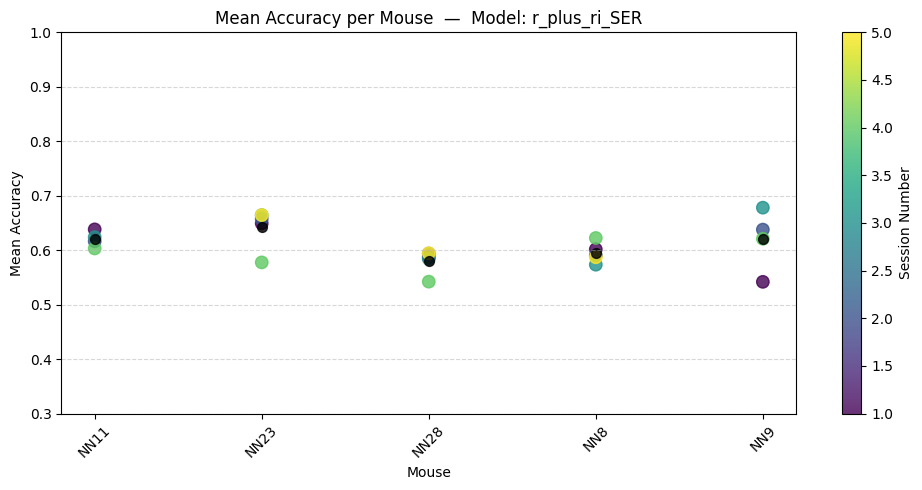

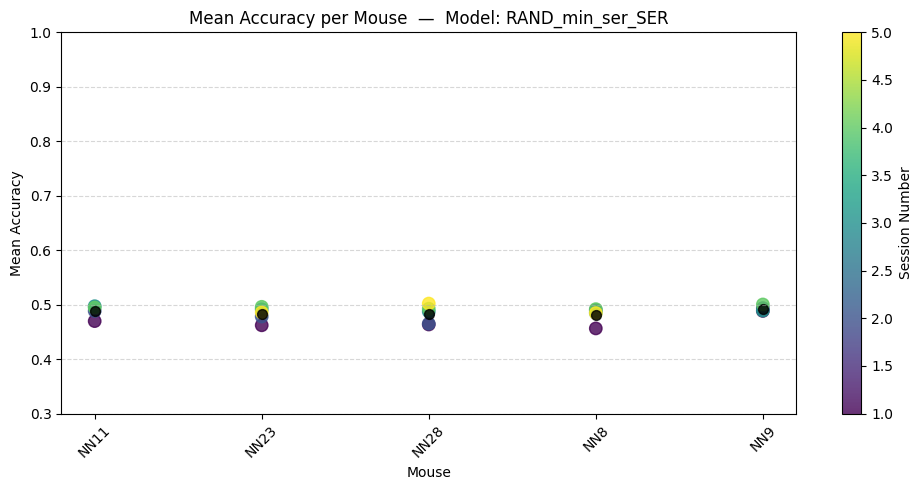

In [36]:
combined = pd.concat(all_mice_results.values(), ignore_index=True)

models = ['SER_min_r_SER', 'SER_min_SER_SER', 'r_min_SER_SER', 'r_plus_ri_SER', 'RAND_min_ser_SER']

for model in models:
    df_model = combined[combined['model'] == model].copy()
    if df_model.empty:
        print(f"No data for model {model}, skipping.")
        continue

    df_model = df_model.sort_values(['mouse', 'date'])
    df_model['session'] = df_model.groupby('mouse').cumcount() + 1

    plt.figure(figsize=(8,4))
    for mouse, df_mouse in df_model.groupby('mouse'):
        plt.scatter(
            df_mouse['session'],
            df_mouse['mean_accuracy'],
            label=mouse,
            s=50,
            alpha=0.8
        )
        sess_means = df_model.groupby('session')['mean_accuracy'].mean()

        plt.scatter(
        sess_means.index,
        sess_means.values,
        color='black',
        s=50,           
        marker='o',
        alpha=.8
    )

    max_sess = df_model['session'].max()
    plt.xticks(ticks=range(1, max_sess+1))
    plt.xlabel('Session Number')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy per Session for Model {model}')
    plt.legend(title='Mouse', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.ylim(0.3,1)
    plt.show()

for model in models:
    df_model = combined[combined['model'] == model].copy()
    if df_model.empty:
        print(f"No data for model {model}, skipping.")
        continue

    # sort & assign session numbers per mouse
    df_model = df_model.sort_values(['mouse', 'date'])
    df_model['session'] = df_model.groupby('mouse').cumcount() + 1

    # now average across days *per* mouse & session
    df_avg = (
        df_model
        .groupby(['mouse', 'session'])['mean_accuracy']
        .mean()
        .reset_index()
    )

    # build a categorical x-axis for mice
    mice = sorted(df_avg['mouse'].unique())
    x_map = {m: i for i, m in enumerate(mice)}

    # set up colormap for session numbers
    sessions = df_avg['session'].unique()
    norm = plt.Normalize(vmin=sessions.min(), vmax=sessions.max())
    cmap = plt.cm.viridis

    plt.figure(figsize=(10,5))
    sc = plt.scatter(
        x=[x_map[m] for m in df_avg['mouse']],
        y=df_avg['mean_accuracy'],
        c=df_avg['session'],
        cmap=cmap,
        norm=norm,
        s=80,
        alpha=0.8
    )
    cbar = plt.colorbar(sc)
    cbar.set_label('Session Number')
    sess_means = df_model.groupby('mouse')['mean_accuracy'].mean()

    plt.scatter(
        sess_means.index,
        sess_means.values,
        color='black',
        s=50,           
        marker='o',
        alpha=0.8
    )

    plt.xticks(ticks=range(len(mice)), labels=mice, rotation=45)
    plt.xlabel('Mouse')
    plt.ylabel('Mean Accuracy')
    plt.title(f'Mean Accuracy per Mouse  —  Model: {model}')
    plt.ylim(0.3, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

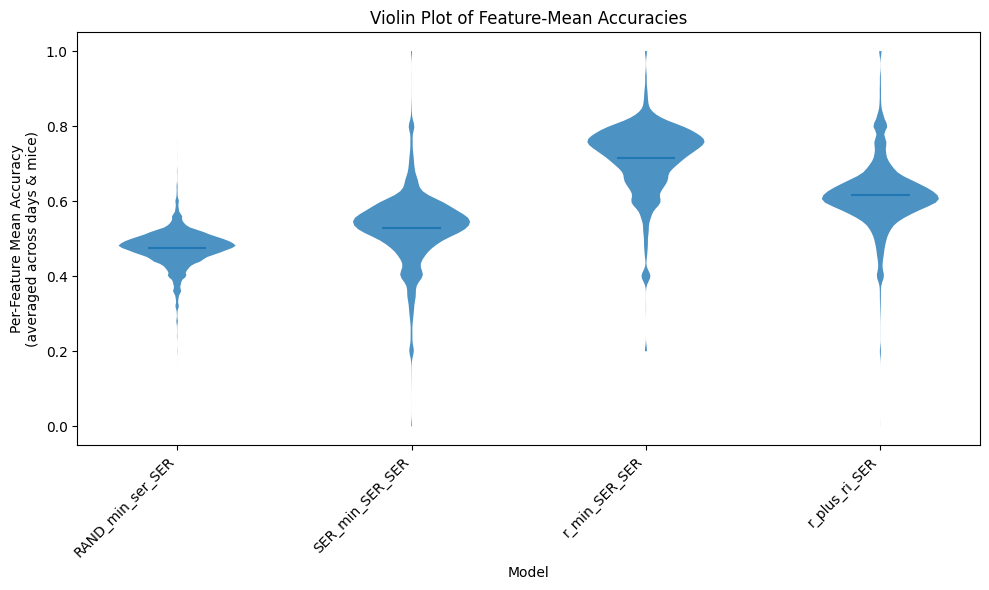

        model_A          model_B  U_statistic  p_value   n_A   n_B  p_adj_bonf  p_adj_fdr_bh  reject_fdr_bh
SER_min_SER_SER    r_min_SER_SER   31635410.0      0.0 20670 20670         0.0           0.0           True
SER_min_SER_SER    r_plus_ri_SER   83008683.0      0.0 20670 20670         0.0           0.0           True
  r_plus_ri_SER RAND_min_ser_SER  402741698.5      0.0 20670 20670         0.0           0.0           True
SER_min_SER_SER RAND_min_ser_SER  329536725.5      0.0 20670 20670         0.0           0.0           True
  r_min_SER_SER RAND_min_ser_SER  414697054.0      0.0 20670 20670         0.0           0.0           True


In [41]:
from scipy.stats import ttest_rel, probplot, ttest_ind
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from scipy.stats import wilcoxon, mannwhitneyu
import scipy.stats as stats
import ast
import statsmodels.formula.api as smf

pairs_to_test = [
    ("SER_min_r_SER",       "SER_min_SER_SER"),
    ("SER_min_SER_SER",   "r_min_SER_SER"),
    ("SER_min_SER_SER",           "r_plus_ri_SER"),
    ("r_plus_ri_SER",        "RAND_min_ser_SER"),
    ("SER_min_SER_SER",       "RAND_min_ser_SER"),
    ("r_min_SER_SER",       "RAND_min_ser_SER"),
    ("SER_min_r_SER",       "RAND_min_ser_SER")
]

models = sorted({m for pair in pairs_to_test for m in pair})

accs_by_model = {m: [] for m in models}
for mouse, df in all_mice_results.items():
    df = df.copy()
    df['all_accs'] = df['all_accs'].apply(
        lambda cell: ast.literal_eval(cell) if isinstance(cell, str) else cell
    )
    for model in models:
        for lst in df.loc[df['model'] == model, 'all_accs']:
            accs_by_model[model].append(lst)

means_by_model = {}
for model, lists in accs_by_model.items():
    if not lists:
        continue
    max_len = max(len(l) for l in lists)
    padded = [
        np.array(l + [np.nan]*(max_len - len(l)), dtype=float)
        for l in lists
    ]
    mat = np.vstack(padded)
    means_by_model[model] = np.nanmean(mat, axis=0)

data = [means_by_model[m] for m in models if m in means_by_model]
labels = [m for m in models if m in means_by_model]

plt.figure(figsize=(10,6))
parts = plt.violinplot(data, showmeans=True, showmedians=False, showextrema=False)
for pc in parts['bodies']:
    pc.set_alpha(0.8)

plt.xticks(range(1, len(labels)+1), labels, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Per-Feature Mean Accuracy\n(averaged across days & mice)')
plt.title('Violin Plot of Feature-Mean Accuracies')
plt.tight_layout()
plt.show()

pairwise_results = []

for A, B in pairs_to_test:
    # only test if both models have mean‐accuracy arrays
    if A in means_by_model and B in means_by_model:
        x = means_by_model[A]
        y = means_by_model[B]

        # drop NaNs (in case your padding left trailing NaNs)
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]

        # run the test (two‐sided by default)
        stat, pval = mannwhitneyu(x, y, alternative='two-sided')

        pairwise_results.append({
            'model_A':     A,
            'model_B':     B,
            'U_statistic': stat,
            'p_value':     pval,
            'n_A':         len(x),
            'n_B':         len(y),
        })

pairwise_df = pd.DataFrame(pairwise_results)
p = pairwise_df['p_value'].values
m = len(p)
pairwise_df['p_adj_bonf'] = np.minimum(p * m, 1.0)

reject, p_fdr, *_ = multipletests(p, alpha=0.05, method='fdr_bh')
pairwise_df['p_adj_fdr_bh'] = p_fdr
pairwise_df['reject_fdr_bh']  = reject

print(pairwise_df.to_string(index=False))

In [ ]:

pairs_to_test = [
    ("r_min_SER_SER",       "SER_min_SER_SER"),
    ("SER_min_SER_SER",   "r_min_SER_SER"),
    ("SER_min_SER_SER",           "r_plus_ri_SER"),
    ("r_plus_ri_SER",        "RAND_min_ser_SER"),
    ("SER_min_SER_SER",       "RAND_min_ser_SER"),
    ("r_min_SER_SER",       "RAND_min_ser_SER"),
    ("r_min_SER_SER",       "RAND_min_ser_SER")
]

def session_stats(df_mouse, model_A, model_B, alpha=0.05):
    """
    For one mouse (df_mouse), return a DataFrame with one row per session (date),
    including p‐value, test_stat, is_significant (A>B), and prop_neurons_A_beats_B.
    """
    rows = []
    for date, grp in df_mouse.groupby('date'):
        try:
            accs_A = grp.loc[grp.model==model_A, 'all_accs'].values[0]
            accs_B = grp.loc[grp.model==model_B, 'all_accs'].values[0]
        except IndexError:
            continue

        accs_A = to_float_array(accs_A)
        accs_B = to_float_array(accs_B)

        # make sure arrays line up
        accs_A = np.array(accs_A)
        accs_B = np.array(accs_B)
        stat, p = mannwhitneyu(accs_A, accs_B, alternative='greater')
        sig = (p < alpha)
        prop = stat / (accs_A.size * accs_B.size)
        rows.append({
            'date': date,
            'stat': stat,
            'pval': p,
            'sig_A_gt_B': sig,
            'prop_neurons_A_gt_B': prop
        })
    return pd.DataFrame(rows)

def to_float_array(raw):
    arr = []
    for x in raw:
        try:
            arr.append(float(x))
        except Exception:
            pass
    return np.array(arr, dtype=float)

def summarize_pair(all_mice_results, model_A, model_B, alpha=0.05):
    """
    Run session_stats on each mouse, then:
     1) For each mouse, compute total_sessions, n_sig, pct_sig.
     2) Count mice with pct_sig >= threshold.
     3) Compute overall avg prop_neurons across all sessions/mice.
    """
    mouse_summary = []
    all_props = []
    for mouse, df_mouse in all_mice_results.items():
        stats = session_stats(df_mouse, model_A, model_B, alpha)
        if stats.empty:
            continue
        total = len(stats)
        n_sig = stats['sig_A_gt_B'].sum()
        pct_sig = n_sig / total
        mouse_summary.append({
            'mouse': mouse,
            'total_sessions': total,
            'n_sig_sessions': n_sig,
            'pct_sig_sessions': pct_sig
        })
        all_props.extend(stats['prop_neurons_A_gt_B'].tolist())

    mouse_df = pd.DataFrame(mouse_summary)
    print("Available columns in per‐mouse DF:", mouse_df.columns.tolist())
    print(mouse_df.head())
    threshold = 0.75
    n_mice = len(mouse_df)
    n_mice_high = (mouse_df['pct_sig_sessions'] >= threshold).sum()
    overall_avg_prop = np.mean(all_props) if all_props else np.nan

    return {
        'per_mouse': mouse_df,
        'n_mice': n_mice,
        'n_mice_above_90pct': n_mice_high,
        'overall_avg_prop_neurons': overall_avg_prop
    }

results = {}
for A, B in pairs_to_test:
    summary = summarize_pair(all_mice_results, A, B)
    results[(A,B)] = summary

for (A,B), out in results.items():
    print(f"\n=== {A} vs {B} ===")
    print("Mice:", out['n_mice'], 
          "with ≥90% sessions sig:", out['n_mice_above_90pct'])
    print("Avg neurons A>B:", out['overall_avg_prop_neurons'])
    print("Per‐mouse breakdown:")
    print(out['per_mouse'].to_string(index=False))

Available columns in per‐mouse DF: ['mouse', 'total_sessions', 'n_sig_sessions', 'pct_sig_sessions']
  mouse  total_sessions  n_sig_sessions  pct_sig_sessions
0   NN9               4               4               1.0
1   NN8               5               4               0.8
2  NN11               4               4               1.0
3  NN23               5               5               1.0
4  NN28               5               5               1.0
Available columns in per‐mouse DF: ['mouse', 'total_sessions', 'n_sig_sessions', 'pct_sig_sessions']
  mouse  total_sessions  n_sig_sessions  pct_sig_sessions
0   NN9               4               0               0.0
1   NN8               5               1               0.2
2  NN11               4               0               0.0
3  NN23               5               0               0.0
4  NN28               5               0               0.0


Available columns in per‐mouse DF: ['mouse', 'total_sessions', 'n_sig_sessions', 'pct_sig_sessions']
  mouse  total_sessions  n_sig_sessions  pct_sig_sessions
0   NN9               4               0               0.0
1   NN8               5               1               0.2
2  NN11               4               0               0.0
3  NN23               5               0               0.0
4  NN28               5               0               0.0
Available columns in per‐mouse DF: ['mouse', 'total_sessions', 'n_sig_sessions', 'pct_sig_sessions']
  mouse  total_sessions  n_sig_sessions  pct_sig_sessions
0   NN9               4               4               1.0
1   NN8               5               5               1.0
2  NN11               4               4               1.0
3  NN23               5               5               1.0
4  NN28               5               5               1.0
Available columns in per‐mouse DF: ['mouse', 'total_sessions', 'n_sig_sessions', 'pct_sig_sessions']
 

In [34]:
import ast
from scipy.stats import ttest_rel, wilcoxon, shapiro

acc2 = []   # SER_min_SER_SER
acc3 = []   # SER_min_r_SER

prob2, prob3, y_true = [], [], []

for mouse, df in all_mice_results.items():
    df['all_accs'] = df['all_accs'].apply(lambda s: ast.literal_eval(s) if isinstance(s, str) else s)

for mouse, df in all_mice_results.items():
    list2 = df.loc[df['model']=='SER_min_SER_SER','all_accs'].iloc[0]
    list3 = df.loc[df['model']=='r_min_SER_SER',  'all_accs'].iloc[0]
    prob2 = df.loc[df['model']=='SER_min_SER_SER','probs'].iloc[0]
    prob3 = df.loc[df['model']=='r_min_SER_SER',  'probs'].iloc[0]
    y_true = df.loc[df['model'] == 'SER_min_SER_SER', 'y_true'].iloc[0]

    acc2.extend(list2)
    acc3.extend(list3)

acc2 = np.array(acc2, dtype=float)
acc3 = np.array(acc3, dtype=float)
prob2 = np.array(prob2)
prob3 = np.array(prob3)
y_true = np.array(y_true)

delta = acc3 - acc2
_, p_sw = shapiro(delta)

if p_sw > 0.05:
    stat, p_val = ttest_rel(acc3, acc2, alternative='greater')
    print(f"Paired t-test: t={stat}, p={p_val}")
else:
    stat, p_val = wilcoxon(acc3, acc2, alternative='greater')
    print(f"Wilcoxon signed-rank: W={stat}, p={p_val}")

mean_diff = delta.mean()
sem      = stats.sem(delta)  # standard error of the mean
ci_low, ci_high = stats.t.interval(
    0.95,
    df = len(delta)-1,
    loc = mean_diff,
    scale = sem
)

cohen_d = mean_diff / delta.std(ddof=1)

print(f"Mean Δaccuracy (Model 3 – Model 2): {mean_diff:.4f}")
print(f"95% CI for Δ: [{ci_low:.4f}, {ci_high:.4f}]")
print(f"Cohen’s d: {cohen_d:.3f}")


Wilcoxon signed-rank: W=504962448.0, p=0.0
Mean Δaccuracy (Model 3 – Model 2): 0.1155
95% CI for Δ: [0.1138, 0.1171]
Cohen’s d: 0.725


In [16]:
print(mouse) 
print(df['model'].unique())


NN9
['SER_min_SER_SER' 'r_min_SER_SER' 'r_plus_ri_SER' 'RAND_min_ser_SER'
 'ri_min_RAND_SER']


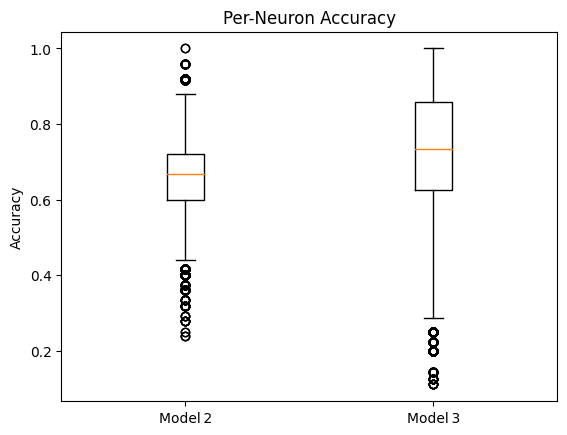

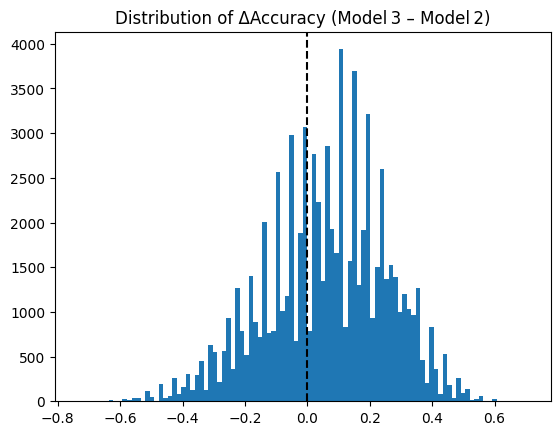

In [11]:

plt.figure()
plt.boxplot([acc2, acc3],
            labels=["Model 2","Model 3"])
plt.ylabel("Accuracy")
plt.title("Per-Neuron Accuracy")

plt.figure()
plt.hist(delta, bins=100)
plt.axvline(0, color="k", linestyle="--")
plt.title("Distribution of ΔAccuracy (Model 3 – Model 2)")
plt.show()


In [26]:
print(f"Mouse {mouse} has models:")
print(df['model'].unique())


Mouse NN28 has models:
['SER_min_SER_SER' 'r_min_SER_SER' 'r_plus_ri_SER' 'RAND_min_ser_SER'
 'ri_min_RAND_SER']


In [51]:
from scipy import stats
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from MLstatkit.stats import Delong_test, Permutation_test

def nri_idi_continuous(y_true, p2, p3):
    """
    Continuous NRI and IDI:
      - NRI = 2 * [P(p3 > p2 | y=1) - P(p3 > p2 | y=0)]
      - IDI = (mean(p3|y=1) - mean(p3|y=0)) - (mean(p2|y=1) - mean(p2|y=0))
    """
    # events vs non-events masks
    ev = y_true == 1
    ne = ~ev
    # continuous NRI
    P_ev = (p3[ev] > p2[ev]).mean()
    P_ne = (p3[ne] < p2[ne]).mean()
    nri = P_ev + P_ne
    # IDI
    sep3 = p3[ev].mean() - p3[ne].mean()
    sep2 = p2[ev].mean() - p2[ne].mean()
    idi = sep3 - sep2
    return nri, idi

def decision_curve(y_true, p, thresholds):
    """
    Compute net benefit at each threshold.
      NB = TP/N - (FP/N) * (threshold / (1-threshold))
    Returns: dict threshold -> net benefit
    """
    N = len(y_true)
    nb = {}
    for t in thresholds:
        preds = p >= t
        tp = ((preds == 1) & (y_true == 1)).sum()
        fp = ((preds == 1) & (y_true == 0)).sum()
        nb[t] = tp / N - fp / N * (t / (1 - t))
    return nb

def lrt_model(y_true, X2, X3):
    """
    Fit two nested logistic regressions:
      - X2: design matrix for smaller model
      - X3: design matrix for larger model (with extra columns)
    Returns: lr_statistic, df_diff, p_value
    """
    logit2 = sm.Logit(y_true, X2).fit(disp=False)
    logit3 = sm.Logit(y_true, X3).fit(disp=False)
    ll2 = logit2.llf
    ll3 = logit3.llf
    lr_stat = 2 * (ll3 - ll2)
    df_diff = X3.shape[1] - X2.shape[1]
    p_val = stats.chi2.sf(lr_stat, df_diff)
    return lr_stat, df_diff, p_val

all_results = []

for mouse, df_mouse in all_mice_results.items():
    df_mouse = df_mouse.set_index(['date','model'])
    probs_wide = df_mouse['probs'].unstack('model')
    y_wide     = df_mouse['y_true'].unstack('model')


    for date, row in probs_wide.iterrows():
        try:
            p2 = np.array(row['SER_min_SER_SER'])
            p3 = np.array(row['r_min_SER_SER'])
            y  = np.array(y_wide.loc[date, 'SER_min_SER_SER'], dtype=int)
        except KeyError:
            # missing one of the models, skip
            print('skip')
            continue

        # If the two models saw different trial counts, skip this session
        if p2.shape != p3.shape or p2.shape != y.shape:
            print(f"Skipping {mouse} {date} (shapes {p2.shape} vs {p3.shape})")
            continue

        # For each neuron (axis=1), compute whatever metrics you like
        n_neurons = y.shape[1]
        for i in range(n_neurons):
            yi, pi2, pi3 = y[:,i], p2[:,i], p3[:,i]
            yi = (yi > 0).astype(int)   # maps –1→0, +1→1
            z_score_DL, p_value_DL = Delong_test(yi, pi2, pi3)
            nri, idi               = nri_idi_continuous(yi, pi2, pi3)

            auc2 = roc_auc_score(yi, pi2)
            auc3 = roc_auc_score(yi, pi3)
            delta_auc = auc3 - auc2

            pred2 = (pi2 > 0.5).astype(int)
            pred3 = (pi3 > 0.5).astype(int)

            acc2 = (pred2 == yi).mean()
            acc3 = (pred3 == yi).mean()

            delta_acc = acc3 - acc2

            all_results.append({
                'mouse':      mouse,
                'date':       date,
                'neuron':     i,
                'p_auc_delong': p_value_DL,
                'nri':        nri,
                'idi':        idi,
                'delta_acc':  delta_acc,
                'delta_auc':   delta_auc,
                'z_auc_delong': z_score_DL,
                'auc2': auc2,
                'auc3': auc3
            })

            #metric_a, metric_b, p_value, benchmark, samples_mean, samples_std = Permutation_test(
                    #yi, pi2, pi3, 'accuracy'
                    #    )


# turn into a DataFrame
metrics_df = pd.DataFrame(all_results)

#stat, combined_p = combine_pvalues(metrics_df['p_auc'], method='fisher')
#print("Fisher’s combined p:", combined_p)

#stat_z, combined_p = combine_pvalues(
#    metrics_df['z_auc'], 
#    method='stouffer'
#)
#print("Stouffer’s combined p:", combined_p)


In [52]:
print(metrics_df)

      mouse    date  neuron  p_auc_delong       nri       idi  delta_acc  \
0       NN9  210428       0      0.230142  1.012500  0.145912   0.027778   
1       NN9  210428       1      0.262540  1.207792  0.195849   0.222222   
2       NN9  210428       2      0.003567  1.455108  0.351810   0.222222   
3       NN9  210428       3      0.002425  1.295238  0.358344   0.250000   
4       NN9  210428       4      0.036592  1.415584  0.240860   0.222222   
...     ...     ...     ...           ...       ...       ...        ...   
50028  NN28  230214    1272      0.000165  1.255760  0.246057   0.178082   
50029  NN28  230214    1273      0.100710  1.118339  0.110745   0.095890   
50030  NN28  230214    1274      0.708963  0.910256  0.023471   0.027397   
50031  NN28  230214    1275      0.169384  1.068318  0.068336   0.041096   
50032  NN28  230214    1276      0.915077  0.851351  0.030117   0.027397   

       delta_auc  z_auc_delong      auc2      auc3  
0       0.140625     -1.199993  0.

In [12]:
from scipy.stats import ttest_1samp

for metric in ['delta_acc','delta_auc','nri','idi']:
    stat, p = ttest_1samp(metrics_df[metric], popmean=0, alternative='greater')
    print(f"{metric}:  t={stat}, p={p}")


delta = metrics_df['delta_acc'].values
stat, pval = stats.ttest_1samp(delta, popmean=0, alternative='greater')
print(f"Δaccuracy t-test: t={stat}, p={pval}")

print(f"% more accruate on average", metrics_df['delta_acc'].mean())

delta_acc:  t=220.86397392380903, p=0.0
delta_auc:  t=252.84463417318142, p=0.0
nri:  t=1254.6948932275257, p=0.0
idi:  t=191.04617108031476, p=0.0
Δaccuracy t-test: t=220.86397392380903, p=0.0
% more accruate on average 0.09464942439920461


In [26]:
import pandas as pd

# 1) Per session × mouse (one Δaccuracy per mouse‐session)
session_summary = (
    metrics_df
      .groupby(['mouse','date'])       # group by both mouse and session
      ['delta_acc']
      .mean()                             # average across neurons
      .reset_index(name='mean_delta_acc') # rename the result column
)

# If you want it as a percentage:
session_summary['mean_delta_acc_%'] = session_summary['mean_delta_acc'] * 100
print(f"per session gains", session_summary)

# 2) Per mouse (one Δaccuracy per mouse, averaged over all sessions and neurons)
mouse_summary = (
    session_summary                        # reuse the session‐level means
      .groupby('mouse')['mean_delta_acc']  # now group by mouse only
      .mean()                              # average over sessions
      .reset_index(name='mouse_delta_acc')
)
mouse_summary['mouse_delta_acc_%'] = mouse_summary['mouse_delta_acc'] * 100
print(f"per mouse gains", mouse_summary)

# 3) Overall (one Δaccuracy for the entire dataset)
overall_delta_acc = mouse_summary['mouse_delta_acc'].mean()
overall_delta_acc_pct = overall_delta_acc * 100

print(f"Overall Δaccuracy: {overall_delta_acc_pct}%")

stat, p = ttest_1samp(mouse_summary['mouse_delta_acc'], popmean=0, alternative='greater')
print(f"Per‐mouse Δaccuracy: t={stat:.3f}, p={p:.4f}")

#so for (100, 2000) input a 10% increase in accuracy means 20000 additional correct trial-neuron predictions



per session gains    mouse    date  mean_delta_acc  mean_delta_acc_%
0   NN11  210626        0.131385         13.138547
1   NN11  210627        0.077207          7.720691
2   NN11  210628        0.098820          9.882008
3   NN11  210629        0.104190         10.419033
4   NN23  220416        0.074857          7.485685
5   NN23  220417        0.084753          8.475305
6   NN23  220418        0.134648         13.464762
7   NN23  220419        0.123150         12.315036
8   NN23  220420        0.097300          9.729953
9   NN28  230210        0.077481          7.748053
10  NN28  230211        0.061868          6.186761
11  NN28  230212        0.063665          6.366533
12  NN28  230213        0.071244          7.124422
13  NN28  230214        0.069137          6.913678
14   NN8  210312        0.084700          8.469960
15   NN8  210314        0.145234         14.523396
16   NN8  210316        0.032406          3.240551
17   NN8  210318        0.113914         11.391443
18   NN8  210

In [28]:
# 1) Overall % of neuron‐sessions with p_auc_delong < 0.05
overall_pct = (
    (metrics_df['p_auc_delong'] < 0.05)
    .mean()
) * 100
print(f"Overall: {overall_pct:.1f}% of neuron‐sessions significant")

# 2) % per mouse‐session
sess_pct = (
    metrics_df
      .assign(sig = metrics_df['p_auc_delong'] < 0.05)
      .groupby(['mouse','date'])['sig']
      .mean()
      .reset_index(name='pct_significant')
)
sess_pct['pct_significant'] *= 100
print("\nPer mouse‐session:")
print(sess_pct)

# 3) % per mouse (averaged over sessions & neurons)
mouse_pct = (
    sess_pct
      .groupby('mouse')['pct_significant']
      .mean()
      .reset_index(name='pct_significant_per_mouse')
)
print("\nPer mouse:")
print(mouse_pct)


Overall: 34.6% of neuron‐sessions significant

Per mouse‐session:
   mouse    date  pct_significant
0   NN11  210626        77.383966
1   NN11  210627        50.751880
2   NN11  210628        73.341163
3   NN11  210629        55.487337
4   NN23  220416         7.682425
5   NN23  220417        52.348993
6   NN23  220418        59.911651
7   NN23  220419        62.231504
8   NN23  220420        46.248196
9   NN28  230210        26.347584
10  NN28  230211         6.170213
11  NN28  230212        11.288120
12  NN28  230213        25.410734
13  NN28  230214        25.998434
14   NN8  210312        11.151427
15   NN8  210314        27.371652
16   NN8  210316        11.709121
17   NN8  210318        62.807439
18   NN8  210320        57.043344
19   NN9  210428        20.493918
20   NN9  210429        57.910075
21   NN9  210501        38.813559
22   NN9  210502        15.286624

Per mouse:
  mouse  pct_significant_per_mouse
0  NN11                  64.241086
1  NN23                  45.684554
2

In [30]:
# 1) Overall % of neuron–sessions with ΔAUC < 0
overall_pct_neg = (
    (metrics_df['delta_auc'] < 0)
    .mean()
) * 100
print(f"Overall: {overall_pct_neg:.1f}% of neuron–sessions where model 3 < model 2 in AUC")

# 2) % per mouse–session
sess_pct_neg = (
    metrics_df
      .assign(is_neg = metrics_df['delta_auc'] < 0)
      .groupby(['mouse','date'])['is_neg']
      .mean()
      .reset_index(name='pct_delta_auc_neg')
)
sess_pct_neg['pct_delta_auc_neg'] *= 100
print("\nPer mouse–session % ΔAUC<0:")
print(sess_pct_neg)

# 3) % per mouse (averaging its sessions)
mouse_pct_neg = (
    sess_pct_neg
      .groupby('mouse')['pct_delta_auc_neg']
      .mean()
      .reset_index(name='pct_delta_auc_neg_per_mouse')
)
print("\nPer mouse % ΔAUC<0 (avg over sessions):")
print(mouse_pct_neg)

#If delta_auc > 0, model 3 performed better.
#If delta_auc < 0, model 2 performed better.


Overall: 12.3% of neuron–sessions where model 3 < model 2 in AUC

Per mouse–session % ΔAUC<0:
   mouse    date  pct_delta_auc_neg
0   NN11  210626           0.084388
1   NN11  210627           2.960526
2   NN11  210628           0.528479
3   NN11  210629           1.765157
4   NN23  220416          26.310380
5   NN23  220417           2.572707
6   NN23  220418           0.993926
7   NN23  220419           0.835322
8   NN23  220420           4.184704
9   NN28  230210          13.011152
10  NN28  230211          36.028369
11  NN28  230212          24.169322
12  NN28  230213          16.100767
13  NN28  230214          15.270164
14   NN8  210312          21.335269
15   NN8  210314           8.119420
16   NN8  210316          32.826623
17   NN8  210318           1.319736
18   NN8  210320           2.476780
19   NN9  210428           9.988942
20   NN9  210429           1.373855
21   NN9  210501           2.994350
22   NN9  210502          17.892299

Per mouse % ΔAUC<0 (avg over sessions):
 

In [55]:
from statsmodels.stats.anova import anova_lm

long_df = metrics_df.melt(
    id_vars=['mouse','date','neuron'],    
    value_vars=['auc2','auc3'],           
    var_name='model_code',                
    value_name='AUC'                      
)

long_df['model'] = long_df['model_code'].map({
    'auc2': 'SER_min_SER_SER',
    'auc3': 'r_min_SER_SER'
})

long_df = long_df.drop(columns='model_code')

md = smf.mixedlm(
    "AUC ~ C(model)",          
    long_df,
    groups=long_df["mouse"],   
    vc_formula={"date": "0 + C(date)"}  
)
mdf = md.fit(reml=False)
print(mdf.summary())

null_md = smf.mixedlm("AUC ~ 1", long_df, groups=long_df["mouse"],
                      vc_formula={"date":"0+C(date)"})
null_res = null_md.fit(reml=False)
lr, p_lr, df_diff = 2*(mdf.llf - null_res.llf), None, mdf.df_modelwc-null_res.df_modelwc
from scipy.stats import chi2
p_lr = chi2.sf(lr, df_diff)
print(f"LRT for model term: χ²={lr}, df={df_diff}, p={p_lr}")


/home/lbeumer/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     AUC       
No. Observations:     100066      Method:                 ML        
No. Groups:           5           Scale:                  0.0093    
Min. group size:      15008       Log-Likelihood:         91794.0809
Max. group size:      26222       Converged:              Yes       
Mean group size:      20013.2                                       
--------------------------------------------------------------------
                          Coef. Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 0.546    0.010  55.288 0.000  0.526  0.565
C(model)[T.r_min_SER_SER] 0.116    0.001 190.606 0.000  0.115  0.118
date Var                  0.002    0.007                            

LRT for model term: χ²=30992.9, df=1, p=0


/home/lbeumer/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [56]:
#allow model to vary between mice

md_rs = smf.mixedlm("AUC ~ C(model)",
                    long_df,
                    groups=long_df["mouse"],
                    re_formula="~C(model)",
                    vc_formula={"date":"0+C(date)"})
rs_res = md_rs.fit(reml=False)
print(rs_res.summary())


/home/lbeumer/.local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lbeumer/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        AUC       
No. Observations:          100066         Method:                    ML        
No. Groups:                5              Scale:                     0.0092    
Min. group size:           15008          Log-Likelihood:            92355.1745
Max. group size:           26222          Converged:                 Yes       
Mean group size:           20013.2                                             
-------------------------------------------------------------------------------
                                      Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                             0.546    0.009 57.890 0.000  0.528  0.565
C(model)[T.r_min_SER_SER]             0.118    0.010 11.994 0.000  0.098  0.137
Group Var                             0.000                  

/home/lbeumer/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/lbeumer/.local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


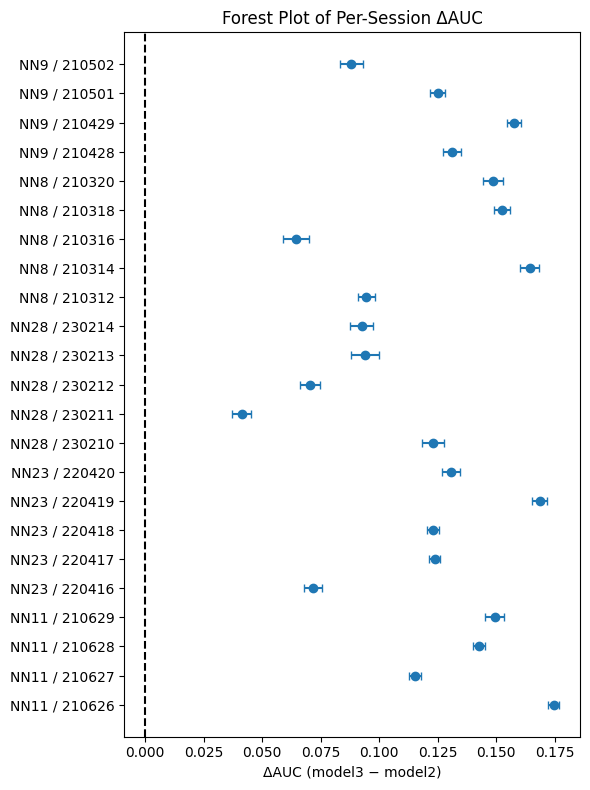

In [59]:
# Compute per‐session mean ± 1.96*SEM
sess_stats = (
    metrics_df
      .groupby(['mouse','date'])['delta_auc']
      .agg(['mean','count','std'])
      .reset_index()
)
sess_stats['sem'] = sess_stats['std'] / np.sqrt(sess_stats['count'])
sess_stats['ci95_lo'] = sess_stats['mean'] - 1.96 * sess_stats['sem']
sess_stats['ci95_hi'] = sess_stats['mean'] + 1.96 * sess_stats['sem']

# Sort for plotting
sess_stats = sess_stats.sort_values(['mouse','date'])

# Plot
plt.figure(figsize=(6,8))
ypos = np.arange(len(sess_stats))
plt.errorbar(
    sess_stats['mean'], ypos,
    xerr=1.96*sess_stats['sem'],
    fmt='o', capsize=3
)
plt.yticks(ypos, sess_stats['mouse'] + " / " + sess_stats['date'].astype(str))
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('ΔAUC (model3 − model2)')
plt.title('Forest Plot of Per-Session ΔAUC')
plt.tight_layout()
plt.show()


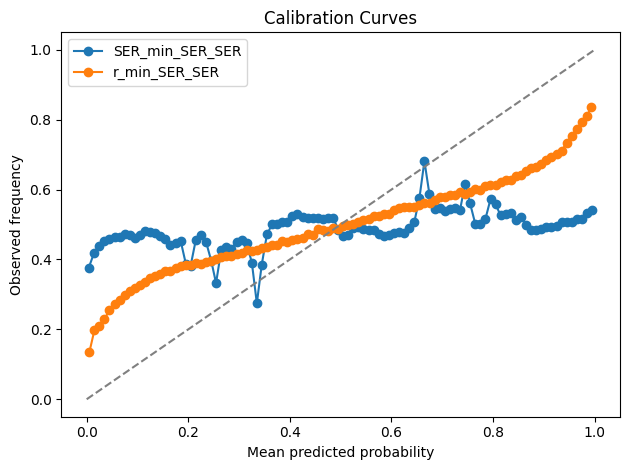

In [64]:
from sklearn.calibration import calibration_curve

y_all, p2_all, p3_all = [], [], []

for mouse, df in all_mice_results.items():
    # set up multi-index so we can unstack by model
    df_mouse = df.set_index(['date','model'])
    probs_wide = df_mouse['probs'].unstack('model')
    y_wide     = df_mouse['y_true'].unstack('model')

    for date in probs_wide.index:
        # try to pull out both models' arrays & the matching y
        try:
            p2 = np.array(probs_wide.loc[date, 'SER_min_SER_SER'])
            p3 = np.array(probs_wide.loc[date, 'r_min_SER_SER'])
            y0 = np.array(y_wide.loc[date,     'SER_min_SER_SER'], dtype=int)
        except KeyError:
            # one of the models was missing on this date, skip it
            continue

        # ensure they all line up
        if p2.shape != p3.shape or p2.shape != y0.shape:
            print(f"Skipping {mouse} {date} (shapes {p2.shape}, {p3.shape}, {y0.shape})")
            continue

        # flatten out trials × neurons into one dimension each
        y_all.extend(y0.ravel())
        p2_all.extend(p2.ravel())
        p3_all.extend(p3.ravel())

# finally convert to numpy arrays
y_all  = np.array(y_all)
p2_all = np.array(p2_all)
p3_all = np.array(p3_all)

# Compute calibration
frac2, mean_pred2 = calibration_curve(y_all, p2_all, n_bins=100)
frac3, mean_pred3 = calibration_curve(y_all, p3_all, n_bins=100)

# Plot
plt.figure()
plt.plot(mean_pred2, frac2, marker='o', label='SER_min_SER_SER')
plt.plot(mean_pred3, frac3, marker='o', label='r_min_SER_SER')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Observed frequency')
plt.title('Calibration Curves')
plt.legend()
plt.tight_layout()
plt.show()


# general learning signal

In [64]:
all_mice_results_cross['NN9'].keys()

Index(['model', 'all_accs', 'mean_accuracy', 'std_accuracy', 'probs', 'y_true',
       'mouse', 'date'],
      dtype='object')

In [69]:
import pandas as pd
import numpy as np

# 1) Define your two models of interest up top:
modelA_name = 'r_min_SER_CROSS_ALL_SER'
modelB_name = 'r_min_SER_SER'

updated_no_cat_SER = {}

for mouse_id, base_df in all_mice_results_cross.items():
    # start from the original DataFrame for this mouse
    df = base_df.copy()
    
    # 2) Loop over the two source‐dicts and their target names
    for source_dict, target_model in [
        (all_mice_results_cross, modelA_name),
        (all_mice_results,       modelB_name)
    ]:
        metrics = source_dict.get(mouse_id)
        if metrics is None:
            # this mouse wasn’t run with that source, skip
            continue
        
        mf = metrics.get('model')
        if mf is None:
            continue
        
        # normalize to a list of model names + remember indices
        if isinstance(mf, str):
            models = [mf]
        else:
            models = list(mf)
        
        # 3) for each occurrence of the target_model, extract that slice
        for idx, m in enumerate(models):
            if m != target_model:
                continue
            
            # build a single‐row record, pulling out the idx’th element for any list‐valued metric
            rec = {}
            for col in df.columns:
                val = metrics.get(col)
                if hasattr(val, '__iter__') and not isinstance(val, (str, bytes)):
                    # list/array/Series → take the correct element
                    rec[col] = val[idx]
                else:
                    # scalar → take as‐is
                    rec[col] = val
            
            # tag it
            rec['mouse'] = mouse_id
            rec['model'] = target_model
            
            # append
            df = pd.concat([df, pd.DataFrame([rec])],
                           ignore_index=True, sort=False)
    
    # store the trimmed+appended DataFrame
    updated_no_cat_SER[mouse_id] = df


In [75]:
pairs_to_test = [ ("r_min_SER_CROSS_ALL_SER",  "r_min_SER_SER")]

results = {}
for A, B in pairs_to_test:
    summary = summarize_pair(updated_no_cat_SER, A, B, alpha=0.05)
    results[(A,B)] = summary

for (A,B), out in results.items():
    print(f"\n=== {A} vs {B} ===")
    print("Mice:", out['n_mice'], 
          "with ≥90% sessions sig:", out['n_mice_above_90pct'])
    print("Avg neurons A>B:", out['overall_avg_prop_neurons'])
    print("Per‐mouse breakdown:")
    print(out['per_mouse'].to_string(index=False))

Available columns in per‐mouse DF: ['mouse', 'total_sessions', 'n_sig_sessions', 'pct_sig_sessions']
  mouse  total_sessions  n_sig_sessions  pct_sig_sessions
0   NN9               4               3              0.75
1   NN8               5               5              1.00
2  NN11               4               4              1.00
3  NN23               5               4              0.80
4  NN28               5               4              0.80

=== r_min_SER_CROSS_ALL_SER vs r_min_SER_SER ===
Mice: 5 with ≥90% sessions sig: 5
Avg neurons A>B: 0.5740096020004944
Per‐mouse breakdown:
mouse  total_sessions  n_sig_sessions  pct_sig_sessions
  NN9               4               3              0.75
  NN8               5               5              1.00
 NN11               4               4              1.00
 NN23               5               4              0.80
 NN28               5               4              0.80


In [78]:
updated_no_cat_SER

{'NN9':                         model  \
 0   SER_min_SER__CROSS_ALLSER   
 1     SER_min_r_CROSS_ALL_SER   
 2     r_min_SER_CROSS_ALL_SER   
 3               r_plus_ri_SER   
 4   SER_min_SER__CROSS_ALLSER   
 5     SER_min_r_CROSS_ALL_SER   
 6     r_min_SER_CROSS_ALL_SER   
 7               r_plus_ri_SER   
 8   SER_min_SER__CROSS_ALLSER   
 9     SER_min_r_CROSS_ALL_SER   
 10    r_min_SER_CROSS_ALL_SER   
 11              r_plus_ri_SER   
 12  SER_min_SER__CROSS_ALLSER   
 13    SER_min_r_CROSS_ALL_SER   
 14    r_min_SER_CROSS_ALL_SER   
 15              r_plus_ri_SER   
 16    r_min_SER_CROSS_ALL_SER   
 17    r_min_SER_CROSS_ALL_SER   
 18    r_min_SER_CROSS_ALL_SER   
 19    r_min_SER_CROSS_ALL_SER   
 20              r_min_SER_SER   
 21              r_min_SER_SER   
 22              r_min_SER_SER   
 23              r_min_SER_SER   
 
                                              all_accs  mean_accuracy  \
 0   [0.5, 0.625, 0.5, 0.875, 0.5, 0.5, 0.75, 0.75,...       0.46517

In [79]:
def nri_idi_continuous(y_true, p2, p3):
    """
    Continuous NRI and IDI:
      - NRI = 2 * [P(p3 > p2 | y=1) - P(p3 > p2 | y=0)]
      - IDI = (mean(p3|y=1) - mean(p3|y=0)) - (mean(p2|y=1) - mean(p2|y=0))
    """
    # events vs non-events masks
    ev = y_true == 1
    ne = ~ev
    # continuous NRI
    P_ev = (p3[ev] > p2[ev]).mean()
    P_ne = (p3[ne] < p2[ne]).mean()
    nri = P_ev + P_ne
    # IDI
    sep3 = p3[ev].mean() - p3[ne].mean()
    sep2 = p2[ev].mean() - p2[ne].mean()
    idi = sep3 - sep2
    return nri, idi

def decision_curve(y_true, p, thresholds):
    """
    Compute net benefit at each threshold.
      NB = TP/N - (FP/N) * (threshold / (1-threshold))
    Returns: dict threshold -> net benefit
    """
    N = len(y_true)
    nb = {}
    for t in thresholds:
        preds = p >= t
        tp = ((preds == 1) & (y_true == 1)).sum()
        fp = ((preds == 1) & (y_true == 0)).sum()
        nb[t] = tp / N - fp / N * (t / (1 - t))
    return nb

def lrt_model(y_true, X2, X3):
    """
    Fit two nested logistic regressions:
      - X2: design matrix for smaller model
      - X3: design matrix for larger model (with extra columns)
    Returns: lr_statistic, df_diff, p_value
    """
    logit2 = sm.Logit(y_true, X2).fit(disp=False)
    logit3 = sm.Logit(y_true, X3).fit(disp=False)
    ll2 = logit2.llf
    ll3 = logit3.llf
    lr_stat = 2 * (ll3 - ll2)
    df_diff = X3.shape[1] - X2.shape[1]
    p_val = stats.chi2.sf(lr_stat, df_diff)
    return lr_stat, df_diff, p_val

all_results = []

for mouse, df_mouse in updated_no_cat_SER.items():
    df_mouse = df_mouse.set_index(['date','model'])
    df_mouse = df_mouse[~df_mouse.index.duplicated(keep='first')]
    probs_wide = df_mouse['probs'].unstack('model')
    y_wide     = df_mouse['y_true'].unstack('model')


    for date, row in probs_wide.iterrows():
        try:
            p2 = np.array(row['r_min_SER_CROSS_ALL_SER'])
            p3 = np.array(row['r_min_SER_SER'])
            y  = np.array(y_wide.loc[date, 'r_min_SER_SER'], dtype=int)
        except KeyError:
            # missing one of the models, skip
            print('skip')
            continue

        # If the two models saw different trial counts, skip this session
        if p2.shape != p3.shape or p2.shape != y.shape:
            print(f"Skipping {mouse} {date} (shapes {p2.shape} vs {p3.shape})")
            continue

        # For each neuron (axis=1), compute whatever metrics you like
        n_neurons = y.shape[1]
        for i in range(n_neurons):
            yi, pi2, pi3 = y[:,i], p2[:,i], p3[:,i]
            yi = (yi > 0).astype(int)   # maps –1→0, +1→1
            z_score_DL, p_value_DL = Delong_test(yi, pi2, pi3)
            nri, idi               = nri_idi_continuous(yi, pi2, pi3)

            auc2 = roc_auc_score(yi, pi2)
            auc3 = roc_auc_score(yi, pi3)
            delta_auc = auc3 - auc2

            pred2 = (pi2 > 0.5).astype(int)
            pred3 = (pi3 > 0.5).astype(int)

            acc2 = (pred2 == yi).mean()
            acc3 = (pred3 == yi).mean()

            delta_acc = acc3 - acc2

            all_results.append({
                'mouse':      mouse,
                'date':       date,
                'neuron':     i,
                'p_auc_delong': p_value_DL,
                'nri':        nri,
                'idi':        idi,
                'delta_acc':  delta_acc,
                'delta_auc':   delta_auc,
                'z_auc_delong': z_score_DL,
                'auc2': auc2,
                'auc3': auc3
            })

            #metric_a, metric_b, p_value, benchmark, samples_mean, samples_std = Permutation_test(
                    #yi, pi2, pi3, 'accuracy'
                    #    )


# turn into a DataFrame
metrics_df = pd.DataFrame(all_results)

#stat, combined_p = combine_pvalues(metrics_df['p_auc'], method='fisher')
#print("Fisher’s combined p:", combined_p)

#stat_z, combined_p = combine_pvalues(
#    metrics_df['z_auc'], 
#    method='stouffer'
#)
#print("Stouffer’s combined p:", combined_p)


Skipping NN9 210428 (shapes (38, 2713) vs (36, 2713))
Skipping NN9 210429 (shapes (63, 2402) vs (61, 2402))
Skipping NN9 210501 (shapes (54, 1770) vs (52, 1770))
Skipping NN9 210502 (shapes (47, 1727) vs (45, 1727))
Skipping NN8 210312 (shapes (29, 4134) vs (27, 4134))
Skipping NN8 210314 (shapes (29, 3584) vs (27, 3584))
Skipping NN8 210316 (shapes (26, 2434) vs (24, 2434))
Skipping NN8 210318 (shapes (88, 1667) vs (86, 1667))
Skipping NN8 210320 (shapes (83, 1292) vs (81, 1292))
Skipping NN11 210626 (shapes (75, 2370) vs (73, 2370))
Skipping NN11 210627 (shapes (110, 2128) vs (108, 2128))
Skipping NN11 210628 (shapes (119, 1703) vs (117, 1703))
Skipping NN11 210629 (shapes (77, 1303) vs (75, 1303))
Skipping NN23 220416 (shapes (37, 3892) vs (35, 3892))
Skipping NN23 220417 (shapes (93, 2682) vs (91, 2682))
Skipping NN23 220418 (shapes (113, 1811) vs (111, 1811))
Skipping NN23 220419 (shapes (77, 1676) vs (75, 1676))
Skipping NN23 220420 (shapes (72, 1386) vs (70, 1386))
Skipping NN28